<a href="https://colab.research.google.com/github/VarunGor/ML/blob/master/Telecom_Customers_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Dataset


---

## Varun GOR

<h2>  Predict the customers who might stop using their services (Decision Tree & Random Forest)</h2>

**Data Fields**
  1. Customer ID : Unique ID of customer
  2. gender : Two categories Male and Female
  3. Senior Citizen : Two categories 0 or 1
  4. Partner : Yes or No
  5. Dependents : Yes or No
  6. tenure : How long have they been with the company
  7. Phone Service : Yes or No
  8. Multiple Lines : Yes, No or No phone service
  9. Internet Service : DSL, Fiber Optics or No
  11. Online Security : Yes, No or No internet service
  12. Online Backup : Yes, No or No internet service
  13. Device Protection : Yes, No or No internet service
  14. Tech Support : Yes, No or No internet service
  15. Streaming TV : Yes, No or No internet service
  16. Streaming Movies : Yes, No or No internet service
  17. Contract : Month-to-month, One year, Two year
  18. Paperless Biling : Yes or No
  19. Payment Method : Electronic check, Mailed check, Bank Transfer(automatic), Credit Card(automatic)
  20. Monthly Charges : Numeric value
  21. Total Charges : Numeric value
  22. Churn : Yes or No

## Loading the Data

In [0]:
import pandas as pd
import numpy as np

In [0]:
url = "https://raw.githubusercontent.com/VarunGor/Dataset/master/Telco-Customer-Churn.xlsx"

telcods = pd.read_excel(url)

In [3]:
print('Data Rows : ', len(telcods))
telcods.head(5)

Data Rows :  7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telcods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [0]:
telcods = telcods.drop(labels = list(telcods.TotalCharges[telcods.TotalCharges == " "].index))
telcods['TotalCharges'] = pd.to_numeric(telcods['TotalCharges'])

## Exploratory Data Analysis (EDA)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
telcods.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


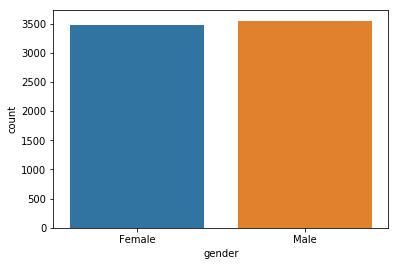

In [8]:
sb.countplot(x='gender', data=telcods)

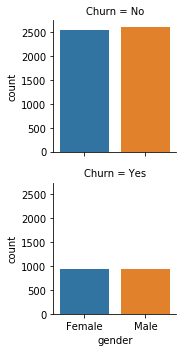

In [9]:
sb.catplot(x='gender', row='Churn', kind='count', data=telcods, height=2.5);

gender has no significant relation with Churn

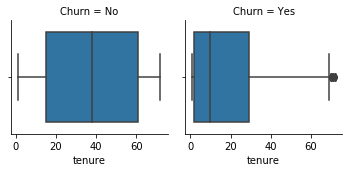

In [10]:
sb.catplot(x='tenure', col='Churn', kind='box', data=telcods, height=2.5);

who has less tenure has more chances of churn

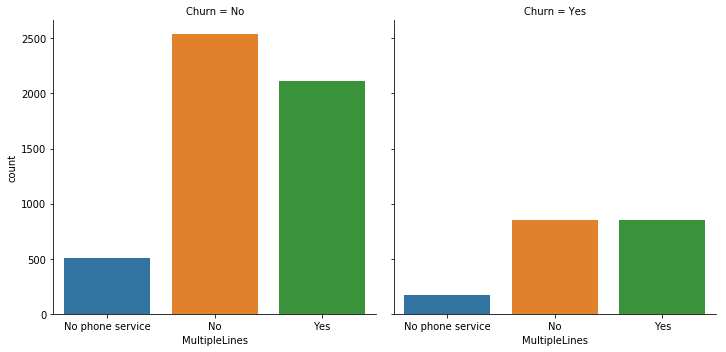

In [11]:
sb.catplot(x='MultipleLines', col='Churn', kind='count', data=telcods);

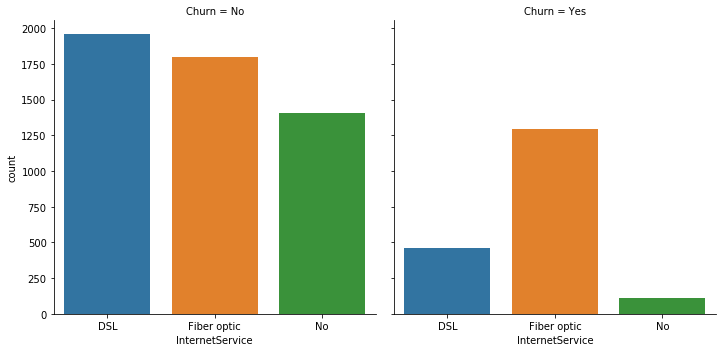

In [12]:
sb.catplot(x='InternetService', col='Churn', kind='count', data=telcods);

Customers who use Fiber optic internet service are more Churning.**Some serious issue with Fiber optic Internet service**

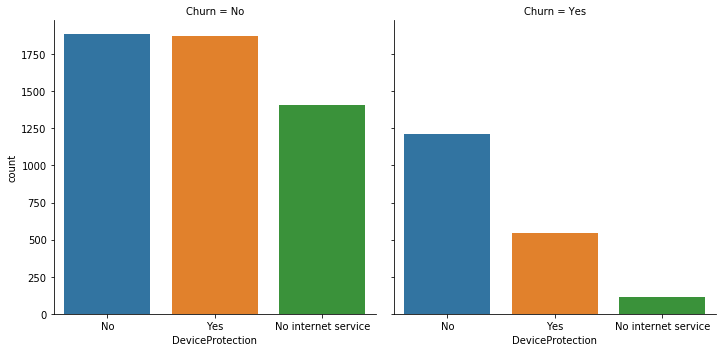

In [13]:
sb.catplot(x='DeviceProtection', col='Churn', kind='count', data=telcods);    

Customers who has Device Protection are more likely to not churn

## Feature Engineering

In [14]:
telcods.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
telcods.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [16]:
print("Class 0 : ",  (telcods['Churn'] == 'No').astype(int).mean() )
print("Class 1 : ", (telcods['Churn'] == 'Yes').astype(int).mean())

Class 0 :  0.7342150170648464
Class 1 :  0.26578498293515357


The classes are imbalanced

**Creating Dummy features from Categorical columns**

In [17]:
cat_var = list(telcods.select_dtypes(include=['object']).columns)
cat_var.remove('customerID')


cat_cols = pd.get_dummies(telcods[cat_var], drop_first=True)
cat_cols.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [18]:
#telcods.head()

num_df = telcods.drop(telcods[cat_var], axis=1)
num_df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,29.85,29.85
1,5575-GNVDE,0,34,56.95,1889.50
2,3668-QPYBK,0,2,53.85,108.15
3,7795-CFOCW,0,45,42.30,1840.75
4,9237-HQITU,0,2,70.70,151.65


In [0]:
dataset = pd.concat([num_df,cat_cols], axis=1 )


In [20]:
print(dataset.shape)
print(dataset.info())

(7032, 32)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7032 non-null object
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes     

All columns are now numeric type, we are now good to go with algorithm

## Decision Tree

<h2> Simple Tree creation

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from graphviz import Source
from sklearn import metrics

In [0]:
# create input X(Independent Variable(s)) and output y(Dependent Variable)

y = dataset['Churn_Yes']

X = dataset.drop(['Churn_Yes','customerID'], axis=1)

In [0]:
# use stratify to target variable as class is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=123, stratify=y)

In [0]:
# use class_weight = 'balanced' as Dependent varible is imbalanced
sim_tree = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=10,  random_state=123, class_weight="balanced")  

In [0]:
# Train Decision Tree model

sim_tree = sim_tree.fit(X_train, y_train)

In [26]:
# List down the Importance of feature identified by Tree model
def takeSecond(elem):
    return elem[1]
  
lst = list(zip(X_train.columns, sim_tree.feature_importances_))
lst.sort(key=takeSecond,reverse=True)
lst

[('Contract_Two year', 0.2361577167081687),
 ('MonthlyCharges', 0.1497354662863875),
 ('Contract_One year', 0.1389554588318531),
 ('TotalCharges', 0.13730973134520885),
 ('tenure', 0.12445391927029299),
 ('InternetService_Fiber optic', 0.05537984959233905),
 ('OnlineSecurity_Yes', 0.020376872966676306),
 ('PaperlessBilling_Yes', 0.01695715542451628),
 ('PaymentMethod_Electronic check', 0.013669501916388294),
 ('SeniorCitizen', 0.012788001568962235),
 ('OnlineBackup_Yes', 0.011867912838938514),
 ('PaymentMethod_Mailed check', 0.010401031075143091),
 ('MultipleLines_Yes', 0.009805536906029318),
 ('StreamingTV_Yes', 0.009320173066307254),
 ('Partner_Yes', 0.00895422508168187),
 ('PaymentMethod_Credit card (automatic)', 0.007560756636235822),
 ('gender_Male', 0.007421795602042811),
 ('TechSupport_Yes', 0.007404097865454432),
 ('PhoneService_Yes', 0.006636145776396404),
 ('StreamingMovies_Yes', 0.006049795464669835),
 ('Dependents_Yes', 0.005784077384815019),
 ('OnlineBackup_No internet ser

In [27]:
# The accuracy of the model on Train data

print(sim_tree.score(X_train, y_train))

0.8165442047878644


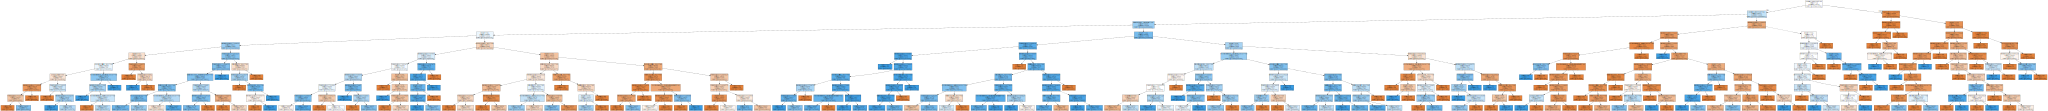

In [28]:
# Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(sim_tree, out_file=dotfile, feature_names=X_train.columns, filled=True)
    dotfile.close()
    
with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

In [0]:
# Prediction of Decision Tree model 
y_pred = sim_tree.predict(X_test)

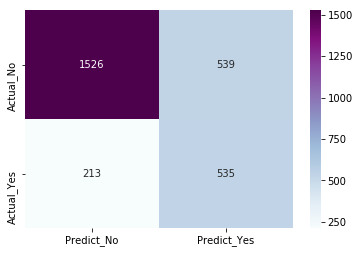

In [30]:
conf =  metrics.confusion_matrix(y_test, y_pred)

sb.heatmap(conf, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_No', 'Predict_Yes'], yticklabels=['Actual_No','Actual_Yes'])

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      2065
           1       0.50      0.72      0.59       748

    accuracy                           0.73      2813
   macro avg       0.69      0.73      0.69      2813
weighted avg       0.78      0.73      0.75      2813



### Parameter Tuning with Grid Search 

Grid-searching is the process of scanning the data to configure optimal parameters for a given model. 

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# Different parameters to test

max_depth = [5,10,12,15,20] 
min_samples_leaf = [3,5,7,9]
criterion = ['gini', 'entropy']

In [0]:
grid_tree =  tree.DecisionTreeClassifier(class_weight="balanced")

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = grid_tree, 
                    cv=5, 
                    param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf, criterion = criterion))

In [53]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, 15, 20],
            

In [54]:
# Best parameters for the model

grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7}

In [55]:
opt_tree = tree.DecisionTreeClassifier(criterion= 'entropy', 
                                       max_depth= 5, 
                                       min_samples_leaf = 7, 
                                       random_state=123, 
                                       class_weight="balanced")
opt_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [56]:
# The accuracy of the Optimized model on Train Data

print(opt_tree.score(X_train, y_train))

0.7440151694714388


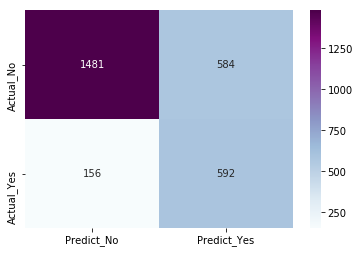

In [57]:
# Prediction of Decision Tree model 
y_pred = opt_tree.predict(X_test)

opt_conf =  metrics.confusion_matrix(y_test, y_pred)

sb.heatmap(opt_conf, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_No', 'Predict_Yes'], yticklabels=['Actual_No','Actual_Yes'])

In [51]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2065
           1       0.50      0.79      0.62       748

    accuracy                           0.74      2813
   macro avg       0.70      0.75      0.71      2813
weighted avg       0.80      0.74      0.75      2813



## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

<h2>Building and fitting Random Forest </h2>

In [0]:
forest = RandomForestClassifier(criterion='gini', 
                                n_estimators = 80, 
                                max_depth = 10, 
                                random_state = 123, 
                                class_weight='balanced')

In [0]:
# Fitting the model on Train Data

sim_forest = forest.fit(X_train, y_train)


In [69]:
# Print the accuracy score of the fitted random forest

print('Accuracy score : ', sim_forest.score(X_train, y_train))

# Importance of each feature 
lst = list(zip(X_train.columns, sim_forest.feature_importances_))
lst.sort(key=takeSecond,reverse=True)
lst

Accuracy score :  0.8712965157620289


[('tenure', 0.18135180329209571),
 ('TotalCharges', 0.14978919994079593),
 ('MonthlyCharges', 0.1046383450901535),
 ('Contract_Two year', 0.08484804800096121),
 ('InternetService_Fiber optic', 0.05991181583558797),
 ('PaymentMethod_Electronic check', 0.04745361973670324),
 ('Contract_One year', 0.04325767276475927),
 ('OnlineSecurity_Yes', 0.03228230894943986),
 ('TechSupport_Yes', 0.030404142564894238),
 ('PaperlessBilling_Yes', 0.023055886997407373),
 ('StreamingMovies_No internet service', 0.021317156900156627),
 ('Partner_Yes', 0.017088324633430334),
 ('Dependents_Yes', 0.01694696535552393),
 ('OnlineBackup_Yes', 0.016765445605343494),
 ('gender_Male', 0.01644729882211045),
 ('StreamingTV_No internet service', 0.0143671145767521),
 ('SeniorCitizen', 0.013382991049443849),
 ('MultipleLines_Yes', 0.012958186532060437),
 ('InternetService_No', 0.012572868419925795),
 ('DeviceProtection_Yes', 0.012214508881513866),
 ('StreamingMovies_Yes', 0.011848102173978093),
 ('DeviceProtection_No 

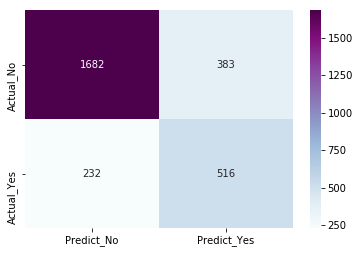

In [70]:
# Making predictions

pred = sim_forest.predict(X_test)

conf_mat = metrics.confusion_matrix(y_test, pred)

sb.heatmap(conf_mat, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_No', 'Predict_Yes'], yticklabels=['Actual_No','Actual_Yes'])

### Parameter Tuning with Randomized Search

Randomized Search will provides best combination of hyerparameter values from a grid of hyperparameters and randomly sample. 

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# Different parameters to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [0]:
feature_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
random_forest = RandomForestClassifier(class_weight="balanced")

random_grid = RandomizedSearchCV(estimator = random_forest, 
                                 n_iter = 10, 
                                 cv = 5, 
                                 verbose=2, 
                                 random_state=123,
                                 param_distributions = feature_grid)

In [85]:
random_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.7s
[CV] n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.7s
[CV] n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.7s
[CV] n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.7s
[CV] n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=188, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.7s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=277, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   52.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_job

In [88]:
print('Best score :' , random_grid.best_score_)
print('Best params :', random_grid.best_params_)

Best score : 0.7890495378051671
Best params : {'n_estimators': 366, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}


In [0]:
opt_forest = RandomForestClassifier(criterion='gini', 
                                    n_estimators = 366, 
                                    min_samples_split = 7,
                                    min_samples_leaf = 1,
                                    max_features = 'sqrt',
                                    max_depth = 60, 
                                    bootstrap = True,
                                    random_state = 123, 
                                    class_weight='balanced')

In [93]:
opt_rand_forest = opt_forest.fit(X_train, y_train)

# Print the accuracy score of the fitted random forest
print('Accuracy score : ', opt_rand_forest.score(X_train, y_train))

Accuracy score :  0.9312633325432567


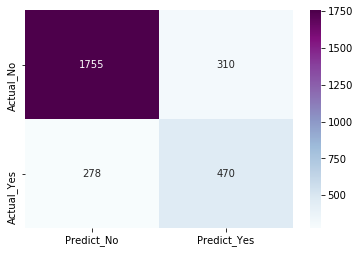

In [94]:
# Making predictions

opt_pred = opt_rand_forest.predict(X_test)

opt_conf_mat = metrics.confusion_matrix(y_test, opt_pred)

sb.heatmap(opt_conf_mat, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_No', 'Predict_Yes'], yticklabels=['Actual_No','Actual_Yes'])

In [95]:
print(metrics.classification_report(y_test, opt_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2065
           1       0.60      0.63      0.62       748

    accuracy                           0.79      2813
   macro avg       0.73      0.74      0.74      2813
weighted avg       0.79      0.79      0.79      2813

